In [1]:
from sklearn import svm

classifier = svm.SVC()

In [2]:
import numpy as np
import pandas as pd

dataset: https://drive.google.com/drive/folders/1NyR0vskEpEGSqumluxfpE22KkS956r9L?usp=sharing

In [3]:
data_train = pd.read_csv("./train.csv")
data_train = data_train.sample(frac=1)
data_train

,filename,dispersion_entropy,RDE,kelas
546,GNSZ064.mat,2.058364,0.019340,GNSZ
429,CPSZ017.mat,1.818042,0.092241,CPSZ
138,CPSZ062.mat,1.944489,0.043998,CPSZ
502,FNSZ402.mat,1.918093,0.056646,FNSZ
504,ABSZ010.mat,1.284294,0.192455,ABSZ
...,...,...,...,...
857,FNSZ314.mat,2.077815,0.018450,FNSZ
704,FNSZ311.mat,2.115211,0.014330,FNSZ
449,FNSZ401.mat,1.922809,0.055738,FNSZ
701,FNSZ339.mat,2.028344,0.032728,FNSZ


In [4]:
data_test = pd.read_csv('./test.csv')
data_test = data_test.sample(frac=1)
data_test

,filename,dispersion_entropy,RDE,kelas
416,CPSZ179.mat,0.037357,0.802633,CPSZ
546,FNSZ660.mat,1.425554,0.234965,FNSZ
251,CPSZ159.mat,1.853245,0.061256,CPSZ
221,FNSZ741.mat,1.365788,0.233327,FNSZ
558,FNSZ927.mat,1.757806,0.086973,FNSZ
...,...,...,...,...
328,FNSZ551.mat,2.120074,0.016986,FNSZ
506,FNSZ821.mat,2.151531,0.008903,FNSZ
80,FNSZ653.mat,1.884829,0.050180,FNSZ
635,GNSZ176.mat,1.594892,0.135580,GNSZ


In [5]:
data_test['kelas'].value_counts()

FNSZ    410
GNSZ    138
CPSZ     98
ABSZ     14
TNSZ      9
TCSZ      9
SPSZ      5
MYSZ      2
Name: kelas, dtype: int64

In [6]:
data_test=data_test[data_test.kelas != "ABSZ"]
data_test=data_test[data_test.kelas != "TCSZ"]
data_test=data_test[data_test.kelas != "TNSZ"]
data_test=data_test[data_test.kelas != "SPSZ"]
data_test=data_test[data_test.kelas != "MYSZ"]

for a in range(250):
    if(data_test['kelas'].iloc[a] == "FNSZ"):
        data_test = data_test.drop(data_test.iloc[a].name)


data_test['kelas'].value_counts()

FNSZ    251
GNSZ    138
CPSZ     98
Name: kelas, dtype: int64

In [7]:
data_train['kelas'].value_counts()

FNSZ    521
GNSZ    172
CPSZ    132
ABSZ     14
TCSZ     11
TNSZ      9
SPSZ      5
MYSZ      2
Name: kelas, dtype: int64

In [8]:
data_train=data_train[data_train.kelas != "ABSZ"]
data_train=data_train[data_train.kelas != "TCSZ"]
data_train=data_train[data_train.kelas != "TNSZ"]
data_train=data_train[data_train.kelas != "SPSZ"]
data_train=data_train[data_train.kelas != "MYSZ"]
data_train['kelas'].value_counts()

for a in range(310):
    if(data_train['kelas'].iloc[a] == "FNSZ"):
        data_train = data_train.drop(data_train.iloc[a].name)


data_train['kelas'].value_counts()

FNSZ    331
GNSZ    172
CPSZ    132
Name: kelas, dtype: int64

In [18]:
for a in range(200,250):
    if(data_train['kelas'].iloc[a] == "FNSZ"):
        data_train = data_train.drop(data_train.iloc[a].name)


data_train['kelas'].value_counts()

FNSZ    225
GNSZ    172
CPSZ    132
Name: kelas, dtype: int64

In [19]:
data_train = data_train.drop(columns=["filename"])
data_train

,dispersion_entropy,RDE,kelas
546,2.058364,0.019340,GNSZ
429,1.818042,0.092241,CPSZ
138,1.944489,0.043998,CPSZ
135,2.105900,0.021936,FNSZ
388,2.097325,0.023070,GNSZ
...,...,...,...
857,2.077815,0.018450,FNSZ
704,2.115211,0.014330,FNSZ
449,1.922809,0.055738,FNSZ
701,2.028344,0.032728,FNSZ


In [20]:
classes_train = np.array(data_train['kelas'])
data_train = data_train.drop(columns=["kelas"])

In [21]:
data_train

,dispersion_entropy,RDE
546,2.058364,0.019340
429,1.818042,0.092241
138,1.944489,0.043998
135,2.105900,0.021936
388,2.097325,0.023070
...,...,...
857,2.077815,0.018450
704,2.115211,0.014330
449,1.922809,0.055738
701,2.028344,0.032728


In [22]:
classifier.fit(data_train,classes_train)

SVC()

In [23]:
data_test = data_test.drop(columns=["filename"])
classes_test = np.array(data_test['kelas'])
data_test = data_test.drop(columns=["kelas"])

In [24]:
prediksi = classifier.predict(data_test)

In [25]:
data_train.iloc[[3]]

,dispersion_entropy,RDE
135,2.1059,0.021936


In [26]:
classifier.predict(data_train.iloc[[3]])

array(['FNSZ'], dtype=object)

In [27]:
classes_train[3]

'FNSZ'

In [28]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(classes_test,prediksi)
print("Akurasi: ",str(acc))

Akurasi:  0.5092402464065708


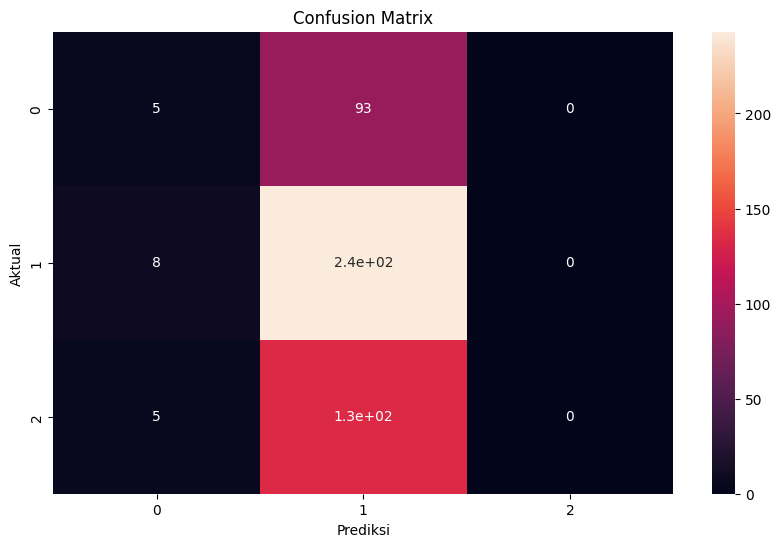

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(classes_test, prediksi)
plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot = True)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()